<a href="https://colab.research.google.com/github/MarwaZAH/EDSA_Projects/blob/main/Ridge_Regression_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### Setting Up the Workspace

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
##### Linear Regression ######

In [2]:
# Here is the url provided for you
url='https://raw.githubusercontent.com/MarwaZAH/EDSA_Projects/main/LinearRegProjects/auto.csv'

In [3]:
#use pd.read_csv() to import the data
cars = pd.read_csv(url)

In [4]:
print(cars)

      mpg  cylinders  displacement  ... year  origin                       name
0    18.0          8         307.0  ...   70       1  chevrolet chevelle malibu
1    15.0          8         350.0  ...   70       1          buick skylark 320
2    18.0          8         318.0  ...   70       1         plymouth satellite
3    16.0          8         304.0  ...   70       1              amc rebel sst
4    17.0          8         302.0  ...   70       1                ford torino
..    ...        ...           ...  ...  ...     ...                        ...
392  27.0          4         140.0  ...   82       1            ford mustang gl
393  44.0          4          97.0  ...   82       2                  vw pickup
394  32.0          4         135.0  ...   82       1              dodge rampage
395  28.0          4         120.0  ...   82       1                ford ranger
396  31.0          4         119.0  ...   82       1                 chevy s-10

[397 rows x 9 columns]


In [5]:
print(cars.keys())

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')


In [6]:
type(cars)

pandas.core.frame.DataFrame

In [7]:
# Check the first few obs
cars[:6]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500


In [8]:
# Check the last few obs
cars[-6:]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
391,27.0,4,151.0,90,2950,17.3,82,1,chevrolet camaro
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
396,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [9]:
# check the data information
cars.shape

(397, 9)

In [10]:
# Run desriptive statistics
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,397.0,23.515869,7.825804,9.0,17.5,23.0,29.0,46.6
cylinders,397.0,5.458438,1.701577,3.0,4.0,4.0,8.0,8.0
displacement,397.0,193.532746,104.379583,68.0,104.0,146.0,262.0,455.0
weight,397.0,2970.261965,847.904119,1613.0,2223.0,2800.0,3609.0,5140.0
acceleration,397.0,15.555668,2.749995,8.0,13.8,15.5,17.1,24.8
year,397.0,75.994962,3.690005,70.0,73.0,76.0,79.0,82.0
origin,397.0,1.574307,0.802549,1.0,1.0,1.0,2.0,3.0


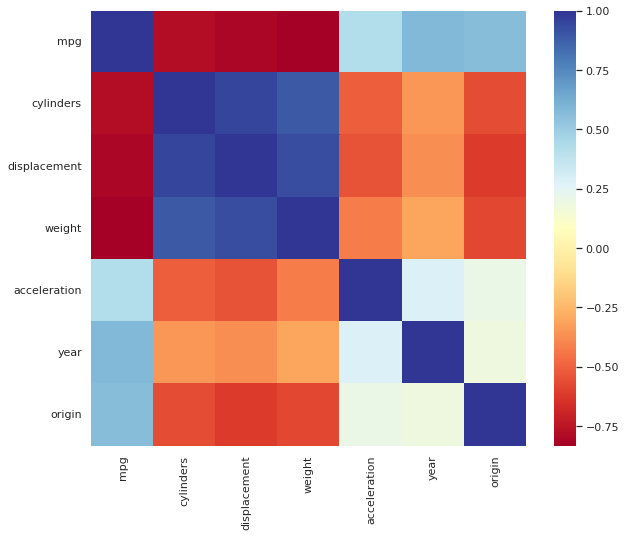

In [12]:
# Setting the figure size 
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(cars.corr(), cmap='RdYlBu', square=True)

In [13]:
cars.mpg.shape

(397,)

In [17]:
X = cars[['cylinders', 'displacement', 'weight', 'acceleration']]
y = cars['mpg']

Text(0.5, 1.0, 'weight vs mpg')

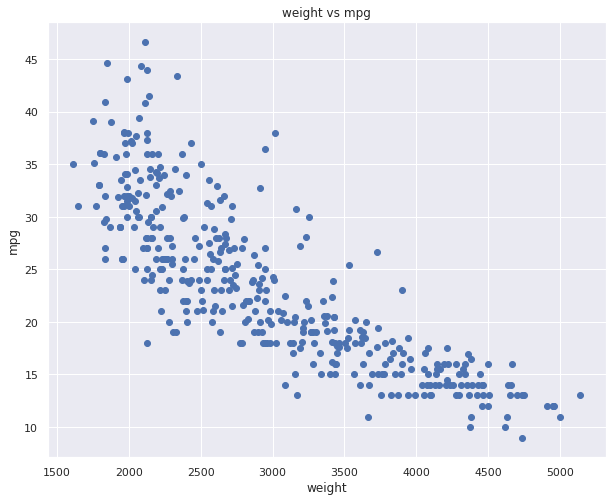

In [18]:
# plot scatter plot
plt.scatter(cars['weight'], cars['mpg'])
plt.xlabel('weight')
plt.ylabel('mpg')
plt.title('weight vs mpg')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


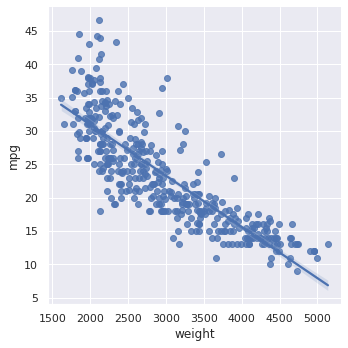

In [19]:
# plot linear regression plot.
sns.lmplot('weight', 'mpg', data= cars)

In [21]:
# Import LinearRegression() from sklearn.linear_model
from sklearn import linear_model

In [22]:
# Create lm object
lm_reg = linear_model.LinearRegression()

In [23]:
type(lm_reg)

sklearn.linear_model._base.LinearRegression

In [25]:
# fit the linear regression model
lm_reg.fit(X, y)

LinearRegression()

In [26]:
# Print the intercept 
print("The model intercept is: ",lm_reg.intercept_)

The model intercept is:  41.825797107206604


In [27]:
# Print the coef 
print("The model parameter is: ", lm_reg.coef_)

The model parameter is:  [-0.27263968 -0.00697302 -0.00614237  0.17821253]


In [28]:
coef_df= pd.DataFrame({'Intercept': lm_reg.intercept_,
                       'Coef': lm_reg.coef_.flatten()})
coef_df

,Intercept,Coef
0,41.825797,-0.272640
1,41.825797,-0.006973
2,41.825797,-0.006142
3,41.825797,0.178213


In [29]:
results = pd.DataFrame(list(zip(cars.columns[1:], lm_reg.coef_)), 
             columns=["Variable", "Coefficient"])
results

,Variable,Coefficient
0,cylinders,-0.272640
1,displacement,-0.006973
2,horsepower,-0.006142
3,weight,0.178213


In [30]:
####  Splitting The Dataset Using sk-learn  ####

In [31]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

In [32]:
# Create the training and test sets
X_train, X_test, y_train, y_test= train_test_split( X, y, 
                                                   test_size=0.3, 
                                                   random_state=10121)

In [33]:
# Print shapes of the training and testing data sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(277, 4) (120, 4) (277,) (120,)


In [35]:
####### Model Training ########
# Create a Linear Regression object
# Import LinearRegression from sklear.linear_model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [36]:
# fit the model on the training set
lm.fit(X_train, y_train)

LinearRegression()

In [37]:
# Predict on train set
pred_train = lm.predict(X_train)
# Predict on test set
pred_test = lm.predict(X_test)

In [43]:
#### Model Evaluation #####
# Import the necessary metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# The R^2 Score
print("The R^2 on the train set is: {:.4f}".format(r2_score(pred_train, y_train)))
print("The R^2 on the test set is: {:.4f}".format(r2_score(pred_test, y_test)))
print("The RMSE on the train set is: {:.4f}".\
      format(np.sqrt(mean_squared_error(y_train, pred_train))))
print("The RMSE on the test set is: {:.4f}".\
      format(np.sqrt(mean_squared_error(y_test, pred_test))))
print("The MAE on the train set is: {:.4f}".\
      format(np.sqrt(mean_absolute_error(y_train, pred_train))))
print("The MAE on the test set is: {:.4f}".\
      format(np.sqrt(mean_absolute_error(y_test, pred_test))))

The R^2 on the train set is: 0.5584
The R^2 on the test set is: 0.5469
The RMSE on the train set is: 4.2666
The RMSE on the test set is: 4.3554
The MAE on the train set is: 1.7995
The MAE on the test set is: 1.8328


In [44]:
# calculate the residuals
resid_train = y_train - pred_train
resid_test = y_test-pred_test

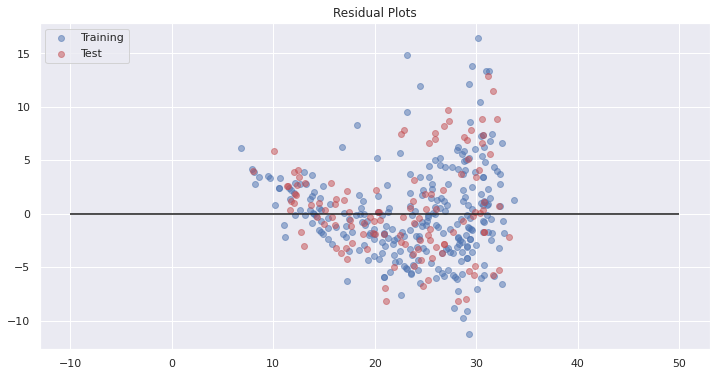

In [45]:
# Scatter plot the training data
plt.figure(figsize= (12, 6))
train = plt.scatter(x = pred_train, y = resid_train , c = 'b', alpha=0.5)

# Scatter plot the testing data
test = plt.scatter(pred_test, resid_test , c = 'r', alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y = 0, xmin = -10, xmax = 50)

# Labels
plt.legend((train, test), ('Training','Test'), loc='upper left')
plt.title('Residual Plots')
plt.show()

In [46]:
############# Importing Ridge Regression submodule ###############

# Import Ridge regression from sklearn.linear_model
from sklearn.linear_model import Ridge

In [47]:
# Create Ridge Regression object with the default parameters
r = Ridge()

In [48]:
# Ridge Regression Parameters

# get the parameters of ridge regression
r.get_params()


{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [49]:
## Fit the ridge regression
r.fit(X, y)

Ridge()

In [50]:
## Access the intercept
r.intercept_

41.821866659452155

In [51]:
## Access the coefficients
r.coef_

array([-0.27014855, -0.00701216, -0.00614251,  0.17810403])

In [53]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

lreg.fit(X, y)

LinearRegression()

In [54]:
## Linear Regression coefficients
lreg.coef_

array([-0.27263968, -0.00697302, -0.00614237,  0.17821253])

In [55]:
## Linear Regression intercepabst
lreg.intercept_

41.825797107206604

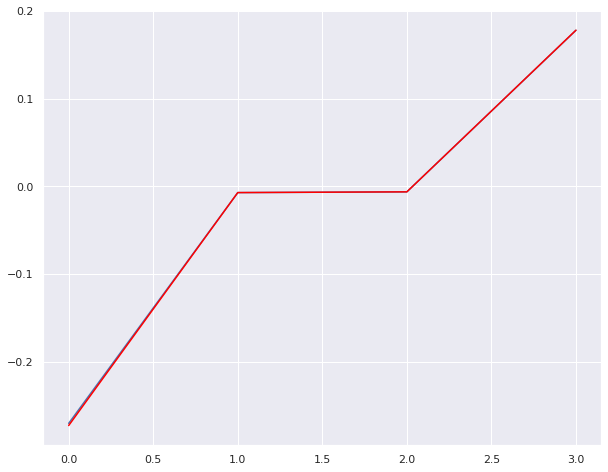

In [56]:
# It is better to plot the coefficient to see the difference
plt.plot(r.coef_)
plt.plot(lreg.coef_, c = 'red')
plt.show()

In [57]:
## See the difference between the lowest coefficient values in both regression
print(np.min(r.coef_), np.min(lreg.coef_))

-0.2701485485838084 -0.2726396838546142


In [58]:
# Set fit_intercept to False
r_cent = Ridge(fit_intercept=False)

# Fit ridge regression
r_cent.fit(X, y)

Ridge(fit_intercept=False)

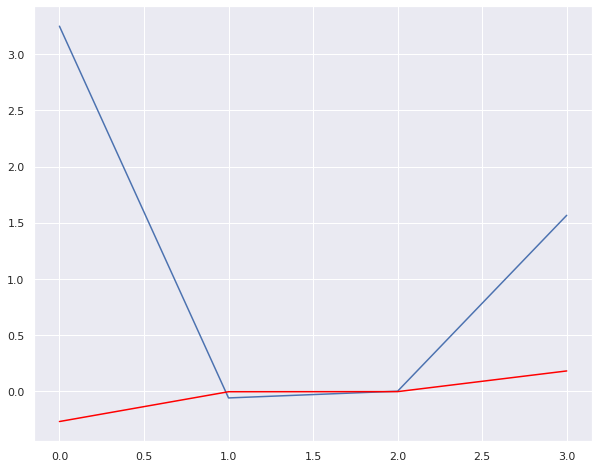

In [59]:
## Plot the coefficients
plt.plot(r_cent.coef_)
plt.plot(lreg.coef_, c = 'red')
plt.show()